In [7]:
import cv2
import os
from pathlib import Path
from tqdm import tqdm

# Caminhos
raw_video_dir = Path("../data/raw")
output_frame_dir = Path("../data/frames")
output_frame_dir.mkdir(parents=True, exist_ok=True)

# DFRAME_RATE = 1  # 1 frame por segundopor segundo~
FRAME_RATE = 5  # Taxa de quadros para extração
FRAME_SIZE = (224, 224)  # Resolução dos frames

In [8]:
def extract_frames(video_path, output_dir, rate=1, resize=(224, 224)):
    cap = cv2.VideoCapture(str(video_path))
    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_interval = int(round(fps / rate))

    count = 0
    saved = 0
    success = True

    while success:
        success, frame = cap.read()
        if not success:
            break
        if count % frame_interval == 0:
            resized = cv2.resize(frame, resize)
            frame_name = f"{video_path.stem}_frame_{saved:04d}.jpg"
            cv2.imwrite(str(output_dir / frame_name), resized)
            saved += 1
        count += 1

    cap.release()
    return saved


In [9]:
video_files = list(raw_video_dir.glob("*.mp4"))
print(f"🎬 Encontrados {len(video_files)} vídeos.")

for video_path in tqdm(video_files):
    video_id = video_path.stem
    output_path = output_frame_dir / video_id
    output_path.mkdir(parents=True, exist_ok=True)

    n_saved = extract_frames(video_path, output_path, rate=FRAME_RATE, resize=FRAME_SIZE)
    print(f"{video_id}: {n_saved} frames guardados.")


🎬 Encontrados 30 vídeos.


  3%|▎         | 1/30 [01:27<42:03, 87.03s/it]

A31H: 1513 frames guardados.


  7%|▋         | 2/30 [03:01<42:42, 91.51s/it]

A36O: 1520 frames guardados.


 10%|█         | 3/30 [04:40<42:42, 94.90s/it]

A40E: 1524 frames guardados.


 13%|█▎        | 4/30 [06:21<42:10, 97.34s/it]

A41X: 1524 frames guardados.


 17%|█▋        | 5/30 [08:03<41:16, 99.07s/it]

A59Z: 1509 frames guardados.


 20%|██        | 6/30 [09:11<35:21, 88.41s/it]

A61V: 1524 frames guardados.


 23%|██▎       | 7/30 [10:26<32:10, 83.92s/it]

A66S: 1526 frames guardados.


 27%|██▋       | 8/30 [11:54<31:14, 85.22s/it]

A80U: 1527 frames guardados.


 30%|███       | 9/30 [13:20<29:58, 85.64s/it]

A83X: 1517 frames guardados.


 33%|███▎      | 10/30 [14:19<25:48, 77.40s/it]

A88O: 1600 frames guardados.


 37%|███▋      | 11/30 [15:58<26:36, 84.00s/it]

A92O: 1525 frames guardados.


 40%|████      | 12/30 [17:26<25:34, 85.23s/it]

A99X: 1517 frames guardados.


 43%|████▎     | 13/30 [18:42<23:20, 82.37s/it]

A99Y: 1519 frames guardados.


 47%|████▋     | 14/30 [20:04<21:55, 82.24s/it]

B12G: 1520 frames guardados.


 50%|█████     | 15/30 [21:23<20:20, 81.37s/it]

B36R: 1522 frames guardados.


 53%|█████▎    | 16/30 [22:32<18:05, 77.57s/it]

B53D: 1521 frames guardados.


 57%|█████▋    | 17/30 [23:41<16:13, 74.88s/it]

B61D: 1521 frames guardados.


 60%|██████    | 18/30 [24:51<14:43, 73.60s/it]

B68G: 1526 frames guardados.


 63%|██████▎   | 19/30 [26:05<13:29, 73.57s/it]

B88L: 1520 frames guardados.


 67%|██████▋   | 20/30 [27:29<12:47, 76.78s/it]

C16G: 1525 frames guardados.


 70%|███████   | 21/30 [29:10<12:36, 84.02s/it]

C18X: 1517 frames guardados.


 73%|███████▎  | 22/30 [30:25<10:49, 81.22s/it]

C28D: 1519 frames guardados.


 77%|███████▋  | 23/30 [31:48<09:33, 81.89s/it]

C33I: 1532 frames guardados.


 80%|████████  | 24/30 [32:52<07:38, 76.35s/it]

C36X: 1519 frames guardados.


 83%|████████▎ | 25/30 [33:47<05:50, 70.02s/it]

C42I: 1509 frames guardados.


 87%|████████▋ | 26/30 [34:39<04:18, 64.54s/it]

C43T: 1513 frames guardados.


 90%|█████████ | 27/30 [35:33<03:04, 61.65s/it]

C46R: 1521 frames guardados.


 93%|█████████▎| 28/30 [36:43<02:07, 63.97s/it]

C48S: 1547 frames guardados.


 97%|█████████▋| 29/30 [37:47<01:04, 64.11s/it]

C56Y: 1551 frames guardados.


100%|██████████| 30/30 [38:53<00:00, 77.78s/it]

C58C: 1542 frames guardados.


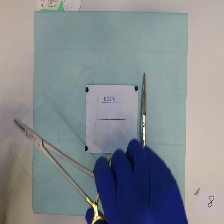

In [10]:
from IPython.display import Image, display
import random

sample_dir = random.choice(list(output_frame_dir.glob("*")))
sample_frame = random.choice(list(sample_dir.glob("*.jpg")))

display(Image(filename=str(sample_frame)))

In [11]:
total_videos = len(list(output_frame_dir.glob("*")))
total_frames = len(list(output_frame_dir.glob("*/*.jpg")))

print(f"✅ Extração completa.")
print(f"🎥 Vídeos processados: {total_videos}")
print(f"🖼️ Frames totais gerados: {total_frames}")

✅ Extração completa.
🎥 Vídeos processados: 30
🖼️ Frames totais gerados: 45770
